In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
# 1. Data analysis

In [3]:
df = pd.read_csv('worldbank.csv')

In [4]:
df.head()

,Time,Time Code,Country Name,Country Code,Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],GDP per capita (current US$) [NY.GDP.PCAP.CD],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Proportion of people living below 50 percent of median income (%) [SI.DST.50MD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL],People with basic handwashing facilities including soap and water (% of population) [SH.STA.HYGN.ZS],"Population, total [SP.POP.TOTL]",GDP (current US$) [NY.GDP.MKTP.CD]
0,2018,YR2018,Afghanistan,AFG,14.20841885,71.33430481,491.337221382603,..,63.081,..,1.18922812944517,0.393489241600037,44.7775364052837,36743039.0,18053222687.4126
1,2018,YR2018,Albania,ALB,6.66844559,351.3012085,5365.48934672897,3.15294480323792,79.184,11.8,4.01934561695576,0.628666281700134,..,2866376.0,15379509891.7196
2,2018,YR2018,Algeria,DZA,6.38729763,266.46469116,4577.21029180491,5.81275129318237,76.066,..,1.40000000000002,0.531993925571442,84.3839771689143,42505035.0,194554483655.528
3,2018,YR2018,American Samoa,ASM,..,..,12552.0546868861,..,..,..,2.6711185308848,..,..,50908.0,639000000
4,2018,YR2018,Andorra,AND,7.37541723,3164.38842773,42819.7745797624,3.2467200756073,..,..,1.58876549046354,..,..,75162.0,3218419896.9641


In [5]:
# Some columns are unnecessary

df.drop(columns=['Time', 'Time Code'], inplace=True)

In [6]:
# For a better visibility, shortening of columns names

df.rename(columns={
    'Country Name': 'Country',
    'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]': 'Health expenditure (% GDP)',
    'Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]': 'Health expenditure per capita (US $)',
    'GDP per capita (current US$) [NY.GDP.PCAP.CD]': 'GDP per capita (US $)',
    'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]': 'Education expenditure (% GDP)',
    'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]': 'Life expectancy (years)',
    'Proportion of people living below 50 percent of median income (%) [SI.DST.50MD]': 'People living below 50 percent of median income (%)',
    'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]': 'GDP growth (% annual)',
    'Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL]': 'Human capital index (HCI)',
    'People with basic handwashing facilities including soap and water (% of population) [SH.STA.HYGN.ZS]': 'Basic handwashing facilities - soap and water (% of population)',
    'Population, total [SP.POP.TOTL]': 'Population, total',
    'GDP (current US$) [NY.GDP.MKTP.CD]': 'GDP (US $)',
    }, inplace=True)

In [7]:
df.head()

,Country,Country Code,Health expenditure (% GDP),Health expenditure per capita (US $),GDP per capita (US $),Education expenditure (% GDP),Life expectancy (years),People living below 50 percent of median income (%),GDP growth (% annual),Human capital index (HCI),Basic handwashing facilities - soap and water (% of population),"Population, total",GDP (US $)
0,Afghanistan,AFG,14.20841885,71.33430481,491.337221382603,..,63.081,..,1.18922812944517,0.393489241600037,44.7775364052837,36743039.0,18053222687.4126
1,Albania,ALB,6.66844559,351.3012085,5365.48934672897,3.15294480323792,79.184,11.8,4.01934561695576,0.628666281700134,..,2866376.0,15379509891.7196
2,Algeria,DZA,6.38729763,266.46469116,4577.21029180491,5.81275129318237,76.066,..,1.40000000000002,0.531993925571442,84.3839771689143,42505035.0,194554483655.528
3,American Samoa,ASM,..,..,12552.0546868861,..,..,..,2.6711185308848,..,..,50908.0,639000000
4,Andorra,AND,7.37541723,3164.38842773,42819.7745797624,3.2467200756073,..,..,1.58876549046354,..,..,75162.0,3218419896.9641


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Country                                                          217 non-null    object 
 1   Country Code                                                     217 non-null    object 
 2   Health expenditure (% GDP)                                       217 non-null    object 
 3   Health expenditure per capita (US $)                             217 non-null    object 
 4   GDP per capita (US $)                                            217 non-null    object 
 5   Education expenditure (% GDP)                                    217 non-null    object 
 6   Life expectancy (years)                                          217 non-null    object 
 7   People living below 50 percent of median inc

In [9]:
# Theoretically, no missing values. In practice, NaN is represented by '..'. Let's fix it. 

df.replace('..', np.nan, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Country                                                          217 non-null    object 
 1   Country Code                                                     217 non-null    object 
 2   Health expenditure (% GDP)                                       187 non-null    object 
 3   Health expenditure per capita (US $)                             187 non-null    object 
 4   GDP per capita (US $)                                            210 non-null    object 
 5   Education expenditure (% GDP)                                    166 non-null    object 
 6   Life expectancy (years)                                          209 non-null    object 
 7   People living below 50 percent of median inc

In [11]:
# 2. Data cleaning

In [12]:
# Now, it is visible that some columns are filled partially, in some cases only by 30%. It makes no sense to remove or artificially fill them,
# what will significantly affect the data for modelling. There are also still text columns, which should not be necessary. Let's remove a few of them. 

dfu = df.drop(columns=[
    'People living below 50 percent of median income (%)',
    'Basic handwashing facilities - soap and water (% of population)',
    'Country',
    'Country Code',
    'Health expenditure per capita (US $)',
    'GDP per capita (US $)',
    ])

In [13]:
dfu.head()

,Health expenditure (% GDP),Education expenditure (% GDP),Life expectancy (years),GDP growth (% annual),Human capital index (HCI),"Population, total",GDP (US $)
0,14.20841885,NaN,63.081,1.18922812944517,0.393489241600037,36743039.0,18053222687.4126
1,6.66844559,3.15294480323792,79.184,4.01934561695576,0.628666281700134,2866376.0,15379509891.7196
2,6.38729763,5.81275129318237,76.066,1.40000000000002,0.531993925571442,42505035.0,194554483655.528
3,NaN,NaN,NaN,2.6711185308848,NaN,50908.0,639000000
4,7.37541723,3.2467200756073,NaN,1.58876549046354,NaN,75162.0,3218419896.9641


In [14]:
# There are NaN values in our target label. Let's remove them with affected rows.

dfu.dropna(subset='Life expectancy (years)', inplace=True)

In [15]:
# Data is not numeric, what should be changed before further operation.

dfu = dfu.apply(pd.to_numeric, errors='coerce')

In [16]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 216
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Health expenditure (% GDP)     183 non-null    float64
 1   Education expenditure (% GDP)  163 non-null    float64
 2   Life expectancy (years)        209 non-null    float64
 3   GDP growth (% annual)          202 non-null    float64
 4   Human capital index (HCI)      166 non-null    float64
 5   Population, total              209 non-null    float64
 6   GDP (US $)                     202 non-null    float64
dtypes: float64(7)
memory usage: 13.1 KB


In [17]:
# NaN values should be removed or filled. Let's try to fill them by median for a given column in order to save as much data as possible. 
# Is it the best idea? We will find out. For comparison, in notebook number two, further processing was done by a different method.

dfu.fillna(dfu.median(), inplace=True)

In [18]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 216
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Health expenditure (% GDP)     209 non-null    float64
 1   Education expenditure (% GDP)  209 non-null    float64
 2   Life expectancy (years)        209 non-null    float64
 3   GDP growth (% annual)          209 non-null    float64
 4   Human capital index (HCI)      209 non-null    float64
 5   Population, total              209 non-null    float64
 6   GDP (US $)                     209 non-null    float64
dtypes: float64(7)
memory usage: 13.1 KB


In [19]:
# 3. Data exploration

In [20]:
dfu.describe()

,Health expenditure (% GDP),Education expenditure (% GDP),Life expectancy (years),GDP growth (% annual),Human capital index (HCI),"Population, total",GDP (US $)
count,209.000000,209.000000,209.000000,209.000000,209.000000,2.090000e+02,2.090000e+02
mean,6.377202,4.327001,72.719711,3.105282,0.563922,3.671019e+07,4.122362e+11
std,2.702349,1.601661,7.583850,2.704998,0.130942,1.407709e+08,1.808840e+12
min,1.897636,0.419998,52.554000,-7.999995,0.299029,1.075100e+04,4.801526e+07
25%,4.530000,3.453570,66.855000,1.667811,0.466417,1.270737e+06,7.878760e+09
50%,6.066301,4.243570,73.806000,3.162405,0.557999,6.982604e+06,3.301928e+10
75%,7.625414,4.934560,78.662000,4.795060,0.629312,2.593115e+07,1.945545e+11
max,18.640678,15.377000,84.928000,8.776224,0.887084,1.402760e+09,2.065652e+13


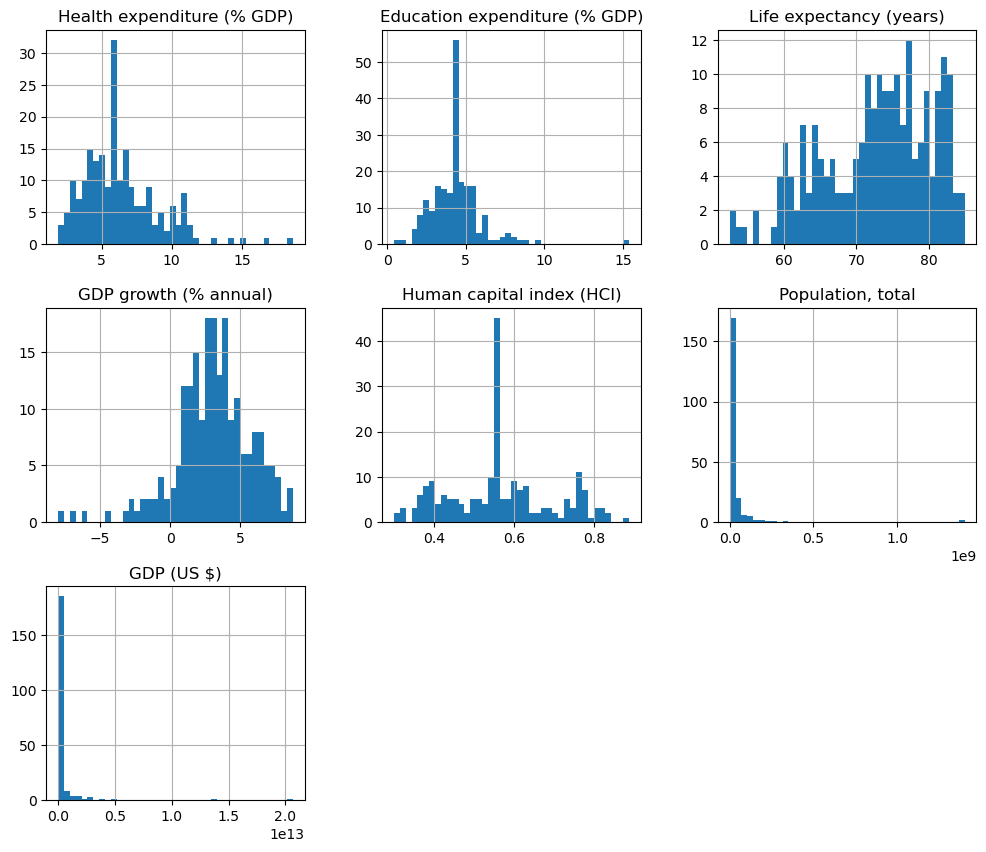

In [21]:
# How can we interpret the shape of data? Histograms show a close to normal distribution for a few features. In some of them (population or GDP) 
# differences between border values are so high that the axis scale cannot reflect those differences visibly. It is also proven
# by standard deviation values shown in the table.

dfu.hist(bins=40, figsize=(12,10))
plt.show()

In [22]:
corr_matrix = dfu.corr()

In [23]:
# It is useful to check what the correlation of parameters looks like. Our label (target value) is life expectancy.

corr_matrix['Life expectancy (years)'].sort_values(ascending=False)

Life expectancy (years)          1.000000
Human capital index (HCI)        0.805047
Health expenditure (% GDP)       0.231754
GDP (US $)                       0.173857
Education expenditure (% GDP)    0.112895
Population, total               -0.000316
GDP growth (% annual)           -0.102616
Name: Life expectancy (years), dtype: float64

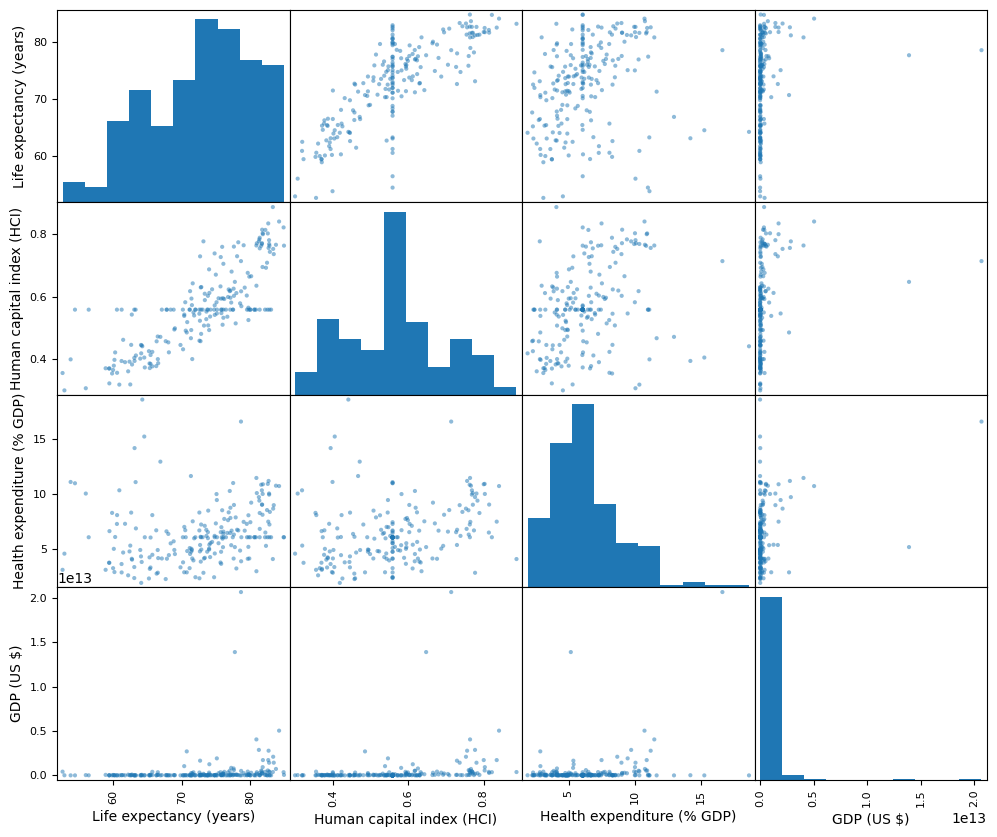

In [24]:
# What can we see in the table above? The highest correlation exists for HCI. There are also 3 others with positive sign and significantly lower value.
# It is also visible in histograms.

feature_list = [
    'Life expectancy (years)',
    'Human capital index (HCI)',
    'Health expenditure (% GDP)',
    'GDP (US $)',
    ]

scatter_matrix(dfu[feature_list], figsize=(12, 10))
plt.show()

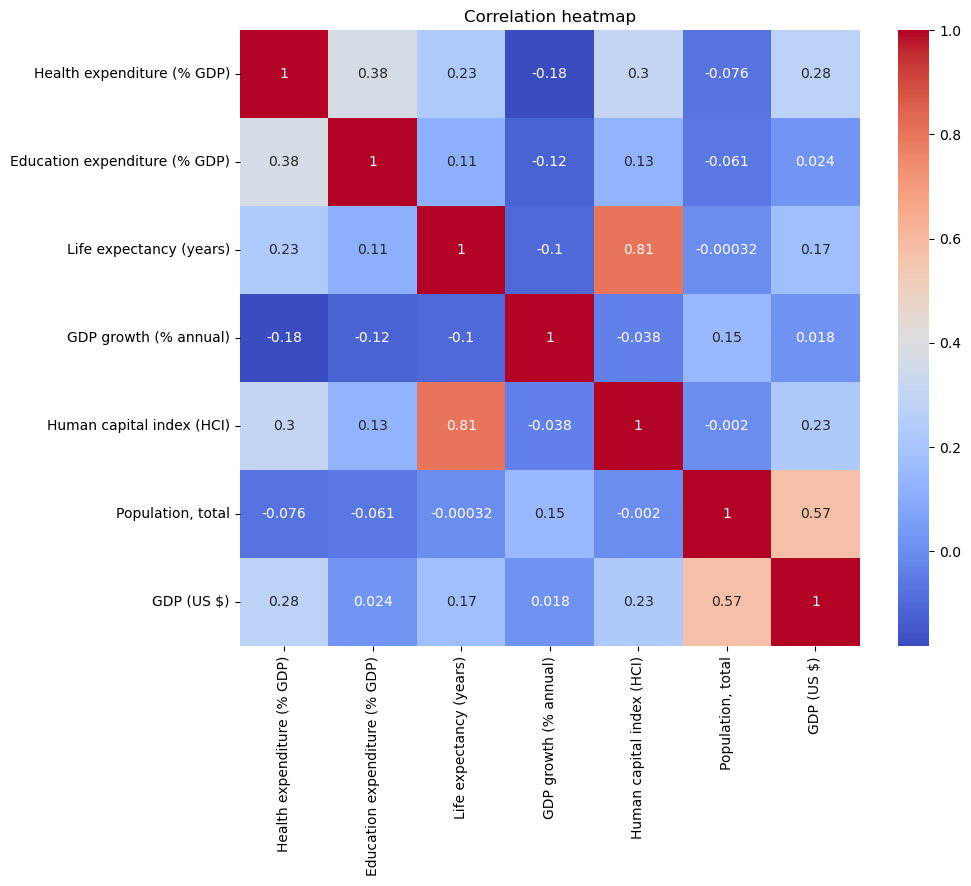

In [25]:
# Heatmap is also a great tool for visualising correlations. There are also a few more visible correlations, like for instance, the population 
# is related to GDP, what seems to be logical.

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

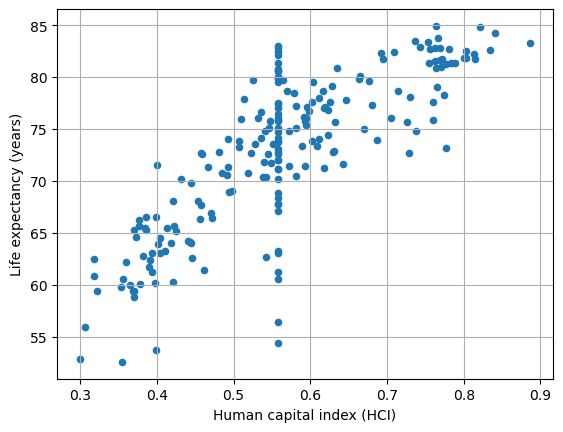

In [26]:
# Looking into the detailed view of the highest ranked parameter, it is visible that figures are related. How can it be revealed? Points are grouped 
# along the invisible line, which is not perpendicular to any of axis and potentially could match vast majority of them. However, there is 
# an interesting fact. In the center of the chart, a vertical line on the median value of HCI is visible. It looks like filling the blank spaces 
# in the dataset by median has its visible impact. 

dfu.plot(kind='scatter', x='Human capital index (HCI)', y='Life expectancy (years)', grid=True)
plt.show()

In [27]:
# 4. Model training and evaluation

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [29]:
# 4.1 Full features model

In [30]:
# Selection of the label and features.

X = dfu.drop('Life expectancy (years)', axis=1)
y = dfu['Life expectancy (years)']

In [31]:
# Split of data in ratio 0.8/0.2 for training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# Training a regression model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [33]:
# Preparation of predictions

linear_predictions_train = linear_model.predict(X_train)
linear_predictions_test = linear_model.predict(X_test)
print(linear_predictions_test[:10].round(0))

[78. 68. 83. 76. 71. 81. 76. 75. 82. 62.]


In [34]:
# Actual values for a comparison. It seems that the values are close to prediction at first glance.

print(y_test[:10].values.round(0))

[80. 73. 82. 77. 71. 83. 76. 74. 83. 66.]


In [35]:
# Relative errors of prediction (by %). In general, values are low (which is good), but there are some bigger outliners in the list.

relative_errors = np.abs(linear_predictions_test - y_test) / y_test * 100
print(relative_errors.values.round(2))

[ 2.85  6.04  1.68  1.54  0.43  2.74  0.09  1.09  1.29  5.85  2.83  5.56
  5.46  7.72 13.81  1.94  2.    4.12  1.93  6.72  3.55  2.4   4.8   1.53
  0.1   2.19  3.82  4.26  3.96  4.6   7.43  1.51  3.8   3.86  8.55  3.99
  0.87  2.67  0.19  9.93  2.32  3.2 ]


In [36]:
# R squared parameter. What do the figures mean in terms of the model accuracy? Value for the train set means that only 63% of the dependent variable
# variation is explained by the model. Value for the test set is higher, 77% of the variation was explained by the model. The value is not so high 
# to interpret it directly as an overfitting, especially if the value for the train set is not so high.

train_score = linear_model.score(X_train, y_train)
test_score = linear_model.score(X_test, y_test)
print(f'r2 train: {train_score}')
print(f'r2 test: {test_score}')

r2 train: 0.6289387633205068
r2 test: 0.7680746393126646


In [37]:
# RMSE for the train set shows 4.7 years of difference in prediction of the correct value. It looks a lot, having in mind 7.6 standard deviation of 
# this variable in the initial dataset. The value for a test set is lower, 3.3 years, what is more acceptable.

rmse_train = root_mean_squared_error(y_train, linear_predictions_train)
rmse_test = root_mean_squared_error(y_test, linear_predictions_test)
print(f'rmse train: {rmse_train}')
print(f'rmse test: {rmse_test}')

rmse train: 4.70424427291162
rmse test: 3.2767080074601176


In [38]:
# 4.2 Single feature model

In [39]:
# Training a simplified model with one feature

X_train_HCI = X_train[['Human capital index (HCI)']]
X_test_HCI = X_test[['Human capital index (HCI)']]
linear_model_simp1 = LinearRegression()
linear_model_simp1.fit(X_train_HCI, y_train)

LinearRegression()

In [40]:
# Preparation of predictions

simp1_predictions_train = linear_model_simp1.predict(X_train_HCI)
simp1_predictions_test = linear_model_simp1.predict(X_test_HCI)

In [41]:
# Values of those R squared parameters are similar to the values from the full model. It means that other features might have negligible influence on
# the delivery of data required for better model performance.

train_score_simp1 = linear_model_simp1.score(X_train_HCI, y_train)
test_score_simp1 = linear_model_simp1.score(X_test_HCI, y_test)
print(f'r2 train: {train_score_simp1}')
print(f'r2 test: {test_score_simp1}')

r2 train: 0.6222395996725869
r2 test: 0.7663161969250384


In [42]:
# RMSE values are similar as well. This confirms the statements described for R squared. How does it relate to the model build previously? It is not
# the best information, showing that the simplest model with one parameter delivers the same performance as a more complex one with more features.

rmse_train_simp1 = root_mean_squared_error(y_train, simp1_predictions_train)
rmse_test_simp1 = root_mean_squared_error(y_test, simp1_predictions_test)
print(f'rmse train: {rmse_train_simp1}')
print(f'rmse test: {rmse_test_simp1}')

rmse train: 4.746519681407343
rmse test: 3.2891064399884358


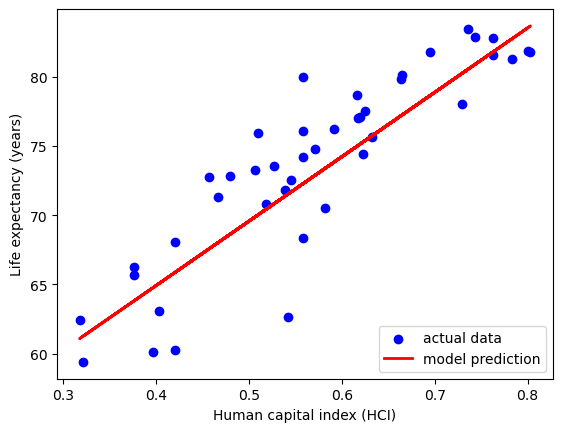

In [43]:
# The chart shows a good fit of the model to the dataset.

plt.scatter(X_test_HCI, y_test, color='blue', label='actual data')
plt.plot(X_test_HCI, simp1_predictions_test, color='red', linewidth=2, label='model prediction')
plt.xlabel('Human capital index (HCI)')
plt.ylabel('Life expectancy (years)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 4.3 Single feature model - different scenario 

In [45]:
# Training a simplified model with one feature - second in terms of correlation

X_train_Hexp = X_train[['Health expenditure (% GDP)']]
X_test_Hexp = X_test[['Health expenditure (% GDP)']]
linear_model_simp2 = LinearRegression()
linear_model_simp2.fit(X_train_Hexp, y_train)

LinearRegression()

In [46]:
# Preparation of predictions

simp2_predictions_train = linear_model_simp2.predict(X_train_Hexp)
simp2_predictions_test = linear_model_simp2.predict(X_test_Hexp)

In [47]:
# Values of those R squared parameters are poor. This model cannot predict correct values for the label, based on this chosen feature.

train_score_simp2 = linear_model_simp2.score(X_train_Hexp, y_train)
test_score_simp2 = linear_model_simp2.score(X_test_Hexp, y_test)
print(f'r2 train: {train_score_simp2}')
print(f'r2 test: {test_score_simp2}')

r2 train: 0.02876891062885245
r2 test: 0.12081691096485503


In [48]:
# RMSE values are high and significantly higher than for previous models. What is the conclusion for those figures? Poor performance of the model 
# revealed by R squared values is now confirmed by real figures, it is not possible to correctly predict the label value using the linear model 
# with this feature.

rmse_train_simp2 = root_mean_squared_error(y_train, simp2_predictions_train)
rmse_test_simp2 = root_mean_squared_error(y_test, simp2_predictions_test)
print(f'rmse train: {rmse_train_simp2}')
print(f'rmse test: {rmse_test_simp2}')

rmse train: 7.610765817407865
rmse test: 6.379744483690226


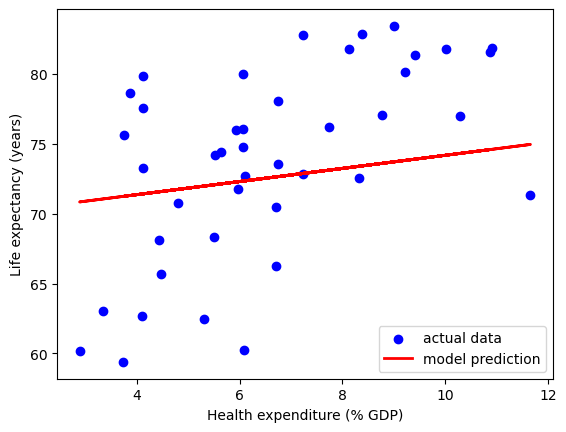

In [49]:
# Model prediction does not fit to the actual data.

plt.scatter(X_test_Hexp, y_test, color='blue', label='actual data')
plt.plot(X_test_Hexp, simp2_predictions_test, color='red', linewidth=2, label='model prediction')
plt.xlabel('Health expenditure (% GDP)')
plt.ylabel('Life expectancy (years)')
plt.legend(loc='lower right')
plt.show()